# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
sat = pd.read_csv('../data/sat.csv')
act = pd.read_csv('../data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [5]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [6]:
act = act.drop([0])
#Dropping the National values so the dataset align.
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2
10,10,Florida,73%,19.0,19.4,21.0,19.4,19.8


##### 3. Describe in words what each variable (column) is.

Unamed: 0 - seems to be a prior index column (will be removed later on).  State - indicates the state in which the student taking the test resides.  Evidence-Based Reading and Writing - the EBRW score.  Math - Math Score.  Total - Sum of the two scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [7]:
sat.isnull().sum()
#Running .isnull to identify any null values

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [8]:
act.isnull().sum()

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [9]:
act.info()
#Running .info to test the types and the totals of each column to see any obvious issues with the data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 8 columns):
Unnamed: 0       51 non-null int64
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.6+ KB


In [10]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


Data seems complete, no null values in either set.  *Note* After plotting the SAT data I found that Maryland had an average Math score of 52.  This is obviously an error, so I went in and replaced it within the dataset.

In [11]:
sat['Math'][20] = 524
#As noted above, one data point seems to be input incorrectly.  I returned to the original data set at (https://blog.prepscholar.com/average-sat-scores-by-state-most-recent) and corrected the error.

C:\Users\tbaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### 5. Print the types of each column.

In [12]:
sat.info()
act.info()
#.Info includes the datatypes for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 8 columns):
Unnamed: 0       51 non-null int64
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.6+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

No, they seem to work as they are define current.  All of the numeric columns are int64 and the non-numerics are objects

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [13]:
sat.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [14]:
act.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [15]:
sat_dict = sat.set_index('State').T.to_dict()


In [16]:
act_dict = sat.set_index('State').T.to_dict()

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

##### 9. Merge the dataframes on the state column.

In [17]:
merged =pd.merge(left = act,right = sat, on=['State'], suffixes = ('_ACT','_SAT'))

merged

,State,Participation_ACT,English,Math_ACT,Reading,Science,Composite,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,5%,593,572,1165
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,38%,547,533,1080
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,30%,563,553,1116
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,3%,614,594,1208
4,California,31%,22.5,22.7,23.1,22.2,22.8,53%,531,524,1055
5,Colorado,100%,20.1,20.3,21.2,20.9,20.8,11%,606,595,1201
6,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,100%,530,512,1041
7,Delaware,18%,24.1,23.4,24.8,23.6,24.1,100%,503,492,996
8,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,100%,482,468,950
9,Florida,73%,19.0,19.4,21.0,19.4,19.8,83%,520,497,1017


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [18]:
mask = {'English': 'English_ACT','Reading':'Reading_ACT','Science':'Science_ACT','Composite':'Composite_ACT','Evidence-Based Reading and Writing':'Reading_Writing_SAT','Total':'Total_SAT'}

merged = merged.rename(columns = mask)

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [19]:
merged.describe()

,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Reading_Writing_SAT,Math_SAT,Total_SAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176,21.519608,569.117647,556.882353,1126.098039
std,2.353677,1.981989,2.067271,3.182463,2.020695,45.666901,47.121395,92.494812
min,16.300000,18.000000,18.100000,2.300000,17.800000,482.000000,468.000000,950.000000
25%,19.000000,19.400000,20.450000,19.900000,19.800000,533.500000,523.500000,1055.500000
50%,20.700000,20.900000,21.800000,21.300000,21.400000,559.000000,548.000000,1107.000000
75%,23.300000,23.100000,24.150000,22.750000,23.600000,613.000000,599.000000,1212.000000
max,25.500000,25.300000,26.000000,24.900000,25.500000,644.000000,651.000000,1295.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [20]:
std = []
#def std(column):
m = np.mean(merged['Math_ACT'])
i - m for i in merged['Math_ACT']

SyntaxError: invalid syntax (<ipython-input-20-6e164b3f0d2f>, line 4)

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [21]:
merged['Participation_SAT'] = merged['Participation_SAT'].str.replace('%','')
merged['Participation_SAT'] = merged['Participation_SAT'].astype(float)
merged['Participation_ACT'] = merged['Participation_ACT'].str.replace('%','')
merged['Participation_ACT'] = merged['Participation_ACT'].astype(float)

In [22]:

merged.sort_values(by = 'Participation_SAT', ascending= False)


,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509,495,1005
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513,493,1005
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555,551,1107
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,1062


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [23]:
merged.query('Participation_SAT > 50')

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513,493,1005
14,Indiana,35.0,22.0,22.4,23.2,22.3,22.6,63.0,542,532,1074
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012


In [24]:
#highschool_data = pd.read_csv('../data/highschooldata.csv')
#mask_state = {"Unnamed: 0" : "State", "Percent of High School Graduates Going Directly to College (%)": "Percent of High School Graduates Going Directly to College (%) - 2014", "Percent of High School Graduates Going Directly to College (%).1" : "Percent of High School Graduates Going Directly to College (%) - 2004"}
#highschool_data.rename(columns = mask_state)

#This section comes from a portion of my data that I ended up not utilizing.  It was including Annual stats for student across a 20 year period.  I found no notable insights from comparing the data many of the comparisons are still below and will be denoted with a comment.

In [25]:
act.describe()

,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176,21.519608
std,2.353677,1.981989,2.067271,3.182463,2.020695
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.450000,19.900000,19.800000
50%,20.700000,20.900000,21.800000,21.300000,21.400000
75%,23.300000,23.100000,24.150000,22.750000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [26]:
1126/1600

0.70375

In [27]:
21.519/36

0.59775

In [28]:
np.mean(merged['Participation_SAT'])

39.80392156862745

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

(array([ 1.,  4., 12.,  2.,  1.,  2.,  4.,  4.,  2., 19.]),
 array([  8. ,  17.2,  26.4,  35.6,  44.8,  54. ,  63.2,  72.4,  81.6,
         90.8, 100. ]),
 <a list of 10 Patch objects>)

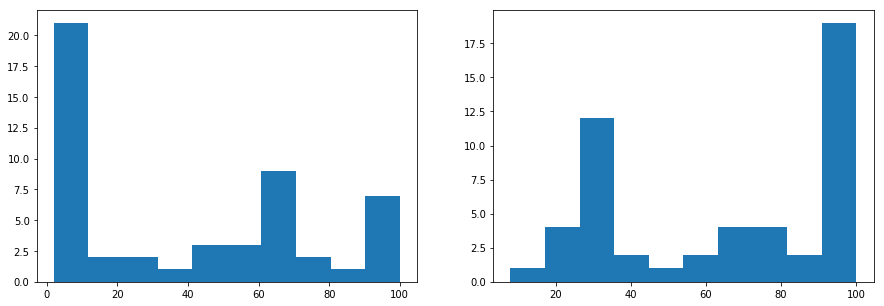

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.hist(merged['Participation_SAT'],bins = 10)
ax2 = fig.add_subplot(1,2,2)
plt.hist(merged['Participation_ACT'],bins = 10)


(array([ 1.,  0.,  3.,  1.,  6.,  6.,  2.,  0.,  1.,  0.,  1.,  1.,  3.,
         1.,  3.,  1.,  1.,  1.,  1., 18.]),
 array([  8. ,  12.6,  17.2,  21.8,  26.4,  31. ,  35.6,  40.2,  44.8,
         49.4,  54. ,  58.6,  63.2,  67.8,  72.4,  77. ,  81.6,  86.2,
         90.8,  95.4, 100. ]),
 <a list of 20 Patch objects>)

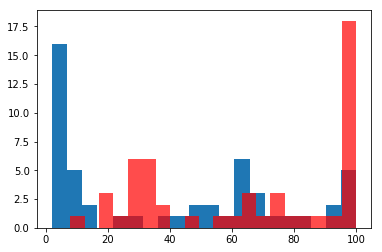

In [30]:
plt.hist(merged['Participation_SAT'],bins = 20)
plt.hist(merged['Participation_ACT'],bins = 20, alpha = .7, color = 'red')

#The assignment calls for these to be graphed seperately but I feel that this is worth including.  
#The participation rate of the ACT ontop of SAT shows the staggering difference between the two.

##### 17. Plot the Math(s) distributions from both data sets.

(array([2., 2., 3., 7., 3., 2., 4., 3., 1., 6., 2., 0., 2., 2., 4., 3., 2.,
        0., 1., 2.]),
 array([18.   , 18.365, 18.73 , 19.095, 19.46 , 19.825, 20.19 , 20.555,
        20.92 , 21.285, 21.65 , 22.015, 22.38 , 22.745, 23.11 , 23.475,
        23.84 , 24.205, 24.57 , 24.935, 25.3  ]),
 <a list of 20 Patch objects>)

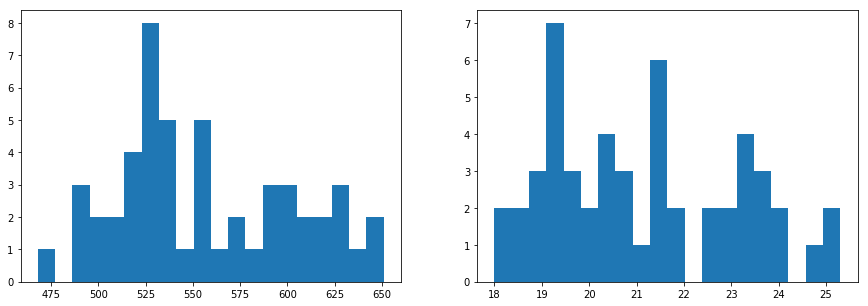

In [31]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.hist(merged['Math_SAT'],bins = 20)
ax2 = fig.add_subplot(1,2,2)
plt.hist(merged['Math_ACT'],bins = 20)


##### 18. Plot the Verbal distributions from both data sets.

(array([1., 0., 1., 2., 2., 8., 5., 3., 3., 1., 8., 0., 2., 1., 0., 4., 5.,
        2., 0., 3.]),
 array([16.3 , 16.76, 17.22, 17.68, 18.14, 18.6 , 19.06, 19.52, 19.98,
        20.44, 20.9 , 21.36, 21.82, 22.28, 22.74, 23.2 , 23.66, 24.12,
        24.58, 25.04, 25.5 ]),
 <a list of 20 Patch objects>)

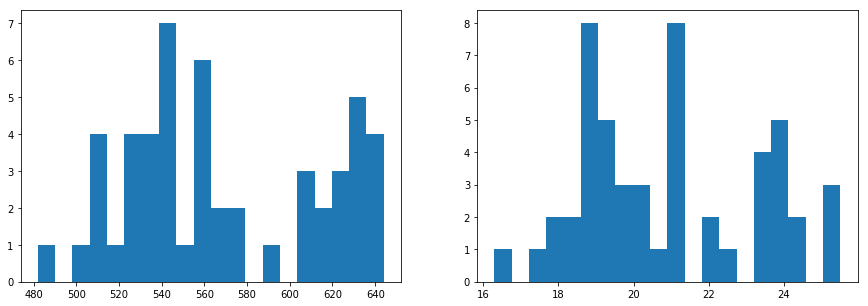

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
plt.hist(merged['Reading_Writing_SAT'],bins = 20)
ax2 = fig.add_subplot(1,2,2)
plt.hist(merged['English_ACT'],bins = 20)


##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Is it normal?

##### 20. Does this assumption hold true for any of our columns? Which?

The score distributions resemble normal distributions but the participation distribution is heavily skewed

##### 21. Plot some scatterplots examining relationships between all variables.

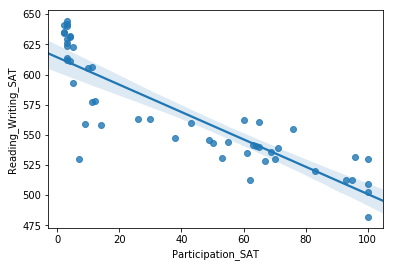

In [33]:

sns.regplot(merged['Participation_SAT'],merged['Reading_Writing_SAT'])


In [34]:
m_reading_SAT = np.mean(merged['Reading_Writing_SAT'])
std_reading_SAT = np.std(merged['Reading_Writing_SAT'])
m_participation_SAT = np.mean(merged['Participation_SAT'])
std_participatin_SAT = np.std(merged['Participation_SAT'])


t_test, pvalue =stats.ttest_ind_from_stats(m_reading_SAT,std_reading_SAT,49,m_participation_SAT,std_participatin_SAT,49)
pvalue

4.477235292606145e-81

In [35]:
np.corrcoef(merged['Participation_SAT'],merged['Reading_Writing_SAT'])

array([[ 1.        , -0.87432575],
       [-0.87432575,  1.        ]])

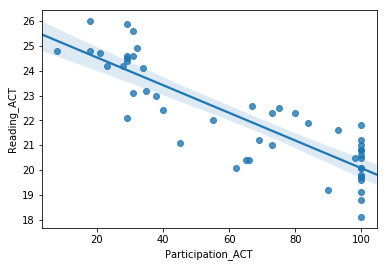

In [36]:
sns.regplot(merged['Participation_ACT'], merged['Reading_ACT'])

In [37]:
m_reading_ACT = np.mean(merged['Reading_ACT'])
std_reading_ACT = np.std(merged['Reading_ACT'])
m_participation_ACT = np.mean(merged['Participation_ACT'])
std_participatin_ACT = np.std(merged['Participation_ACT'])


t_test, pvalue =stats.ttest_ind_from_stats(m_reading_ACT,std_reading_ACT,49,m_participation_ACT,std_participatin_ACT,49)
pvalue

1.83966024279624e-15

In [38]:
np.corrcoef(merged['Participation_ACT'],merged['Reading_ACT'])

array([[ 1.       , -0.8666204],
       [-0.8666204,  1.       ]])

##### 22. Are there any interesting relationships to note?

Yes, interestingly as student participation goes down the scores go up.  I assume this is likely due to the required states that issue the ACT and SAT forcing students to take the test during school hours, thus students who are unprepared and unwilling to take the test drive the scores down.  Would require further information to truly make that determination.

##### 23. Create box plots for each variable. 

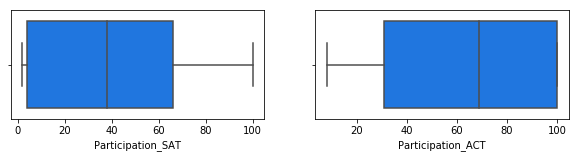

In [57]:
fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(merged['Participation_SAT'], color = (0,.45,1))
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(merged['Participation_ACT'], color = (0,.45,1))

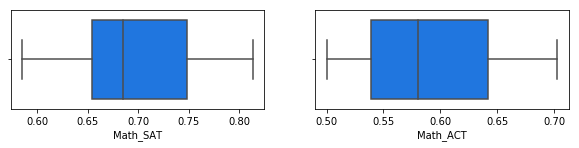

In [56]:
fig2 = plt.figure(figsize=(10,4))
ax3 = fig2.add_subplot(2,2,1)
sns.boxplot(merged['Math_SAT']/800, color = (0,.45,1))
ax4 = fig2.add_subplot(2,2,2)
sns.boxplot(merged['Math_ACT']/36, color = (0,.45,1))

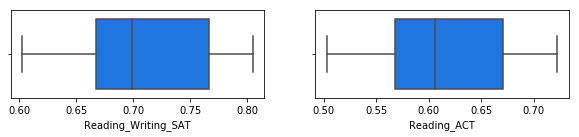

In [59]:
fig = plt.figure(figsize=(10,5.5))
ax5 = fig.add_subplot(3,2,1)
sns.boxplot(merged['Reading_Writing_SAT']/800, color = (0,.45,1))
ax6 = fig.add_subplot(3,2,2)
sns.boxplot(merged['Reading_ACT']/36, color = (0,.45,1))

In [58]:
m_reading_sat = np.mean(merged['Reading_Writing_SAT'])
std_reading_sat = np.std(merged['Reading_Writing_SAT'])
m_reading_act = np.mean(merged['Reading_ACT'])
std_reading_act = np.std(merged['Reading_ACT'])


t_test, pvalue =stats.ttest_ind_from_stats(m_reading_sat,std_reading_sat,49,m_reading_act,std_reading_act,49)
pvalue

5.640757315673298e-92

We see that these box plots are very similar to one another, speaking to the similarity of both tests.  The only variance we see is the participation.  As theorized, one test directly correlates to the other in that individuals taking one test often wont take the second.  As more people adopt ACT as a their preference for test the seperation of participation will continue.  

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [ ]:
#Note heatmap in presentation.

## Step 4: Descriptive and Inferential Statistics

In [ ]:
#As noted above, some further testing for percent colleges for students - this data ended up not yielding any notable results.



#mask_pc = {"Unnamed: 0":"States","Percent of High School Graduates Going Directly to College (%)": "2014","Percent of High School Graduates Going Directly to College (%).1":"2004","Percent of High School Graduates Going Directly to College (%).2":'1994'}
#percent_college = highschool_data[["Unnamed: 0", "Percent of High School Graduates Going Directly to College (%)", 'Percent of High School Graduates Going Directly to College (%).1','Percent of High School Graduates Going Directly to College (%).2']]

#percent_college = percent_college.rename(columns = mask_pc)

#percent_college.to_csv('../data/percent_college.csv',header=True)

#state_req=pd.read_csv('../data/Staterequirement.csv')
#state_req.replace(1,'SAT', inplace = True)
#state_req.replace(2,'ACT', inplace = True)
#state_req.replace(3,'Both', inplace = True)
#state_req.replace(0,'Neither', inplace = True)


#state_req = pd.get_dummies(state_req, columns=['Requirement'])
#Seemingly didnt plot correctly to the map in Tableau.  On friday saw the process April took and should have used that.

In [ ]:
merged.sort_values('Participation_ACT', ascending = False)

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [ ]:
#Note Presentation

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [ ]:
#Note presentation

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [ ]:
np.corrcoef(merged['Participation_SAT'],merged['Participation_ACT'])

In [ ]:
m_SAT = np.mean(merged['Participation_SAT'])
std_SAT = np.std(merged['Participation_SAT'])
m_ACT = np.mean(merged['Participation_ACT'])
std_ACT = np.std(merged['Participation_ACT'])


t_test, pvalue =stats.ttest_ind_from_stats(m_SAT,std_SAT,49,m_ACT,std_ACT,49)
pvalue

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [ ]:
z=1.96

#ci_lower = mean_participation - z*standard_error
#ci_upper = mean_participation + z*standard_error

mean_participation_SAT = np.mean(merged['Participation_SAT'])
standard_error = np.std(merged['Participation_SAT'], ddof=1)/np.sqrt(len(merged['Participation_SAT']))
ci_lower_SAT = mean_participation_SAT - z*standard_error
ci_upper_SAT = mean_participation_SAT + z*standard_error
print('95% confidence interval:',ci_lower_SAT,ci_upper_SAT)

mean_participation_SAT = np.mean(merged['Participation_ACT'])
standard_error = np.std(merged['Participation_ACT'], ddof=1)/np.sqrt(len(merged['Participation_ACT']))
ci_lower_ACT = mean_participation_SAT - z*standard_error
ci_upper_ACT = mean_participation_SAT + z*standard_error
print('95% confidence interval:',ci_lower_ACT,ci_upper_ACT)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Not particularly, the nature of the test is that many people are only opting in for one test.  As more states impliment the ACT as their test of choice fewer individuals will take the SAT.  This is why the participation of states in one test causes the participation of the other to drop substantially.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

I don't think so as they dont directly associate with one another.  It seems (as noted below) that there is a negative correlation between them.

In [ ]:
np.corrcoef(merged['Math_SAT'],merged['Math_ACT'])

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

This data is only from 2016, to make inferencial statistics moving forward we would need histrical data from the test.